##Basic information about this notebook:



#Necessary Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
try:
  from category_encoders import LeaveOneOut
  print("category_encoders is installed!")
except ImportError:
  print("category_encoders is not installed. Installing...")
  !pip install category_encoders

category_encoders is not installed. Installing...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 931.5 kB/s eta 0:00:00


#Read the contents of the data from the csv files

In [3]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [4]:
train.head()

,ID,Brand,Tipe,CPU,RAM,Memori,GPU,SistemOperasi,Berat,Layar,Harga
0,0,Pulse,NaN,Intel Core i3 7100U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 620,Gemini 5,1.4kg,13.3inch IPS Panel Full HD 1920x1080,16258268.00
1,1,Pulse,Notebook,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Gemini 2,2.32kg,15.6inch Full HD 1920x1080,14133900.00
2,2,Zenith,2 in 1 Convertible,NaN,8GB,256GB SSD,Intel HD Graphics 520,Gemini 5,1.6kg,13.3inch IPS Panel Full HD / Touchscreen 1920x...,13517319.32
3,3,Vivid,Notebook,NaN,4GB,500GB HDD,Intel HD Graphics 400,No OS,1.86kg,15.6inch 1366x768,4437188.00
4,4,Zenith,Notebook,Intel Core i3 6006U 2GHz,NaN,500GB HDD,Nvidia GeForce GTX 940MX,Gemini 5,2.2kg,15.6inch 1366x768,8034908.00


#EDA Questions

##Bagaimana kondisi dataset yang telah diterima? (Jumlah data, baris, kolom, missing values, dsb)

There are 1042 data points (1042, rows), with 11 columns.
  The following columns have missing values:
*   Tipe: 63
*   CPU: 94
*   RAM: 31
*   GPU: 63
*   SistemOperasi: 31







In [5]:
train.shape
train.isnull().sum()

ID                0
Brand             0
Tipe             63
CPU              94
RAM              31
Memori            0
GPU              63
SistemOperasi    31
Berat             0
Layar             0
Harga             0
dtype: int64

##Bagaimana distribusi nilai dari variabel-variabel dataset tersebut?


Brand
Tipe
CPU
RAM
Memori
GPU
SistemOperasi
Berat
Layar


<ipython-input-6-a1c07641b135>:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train_copy[column], shade=True, color='lightcoral')


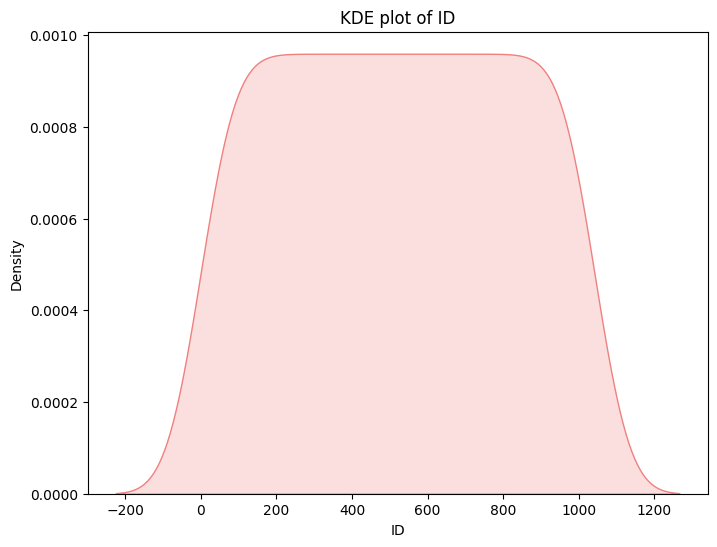

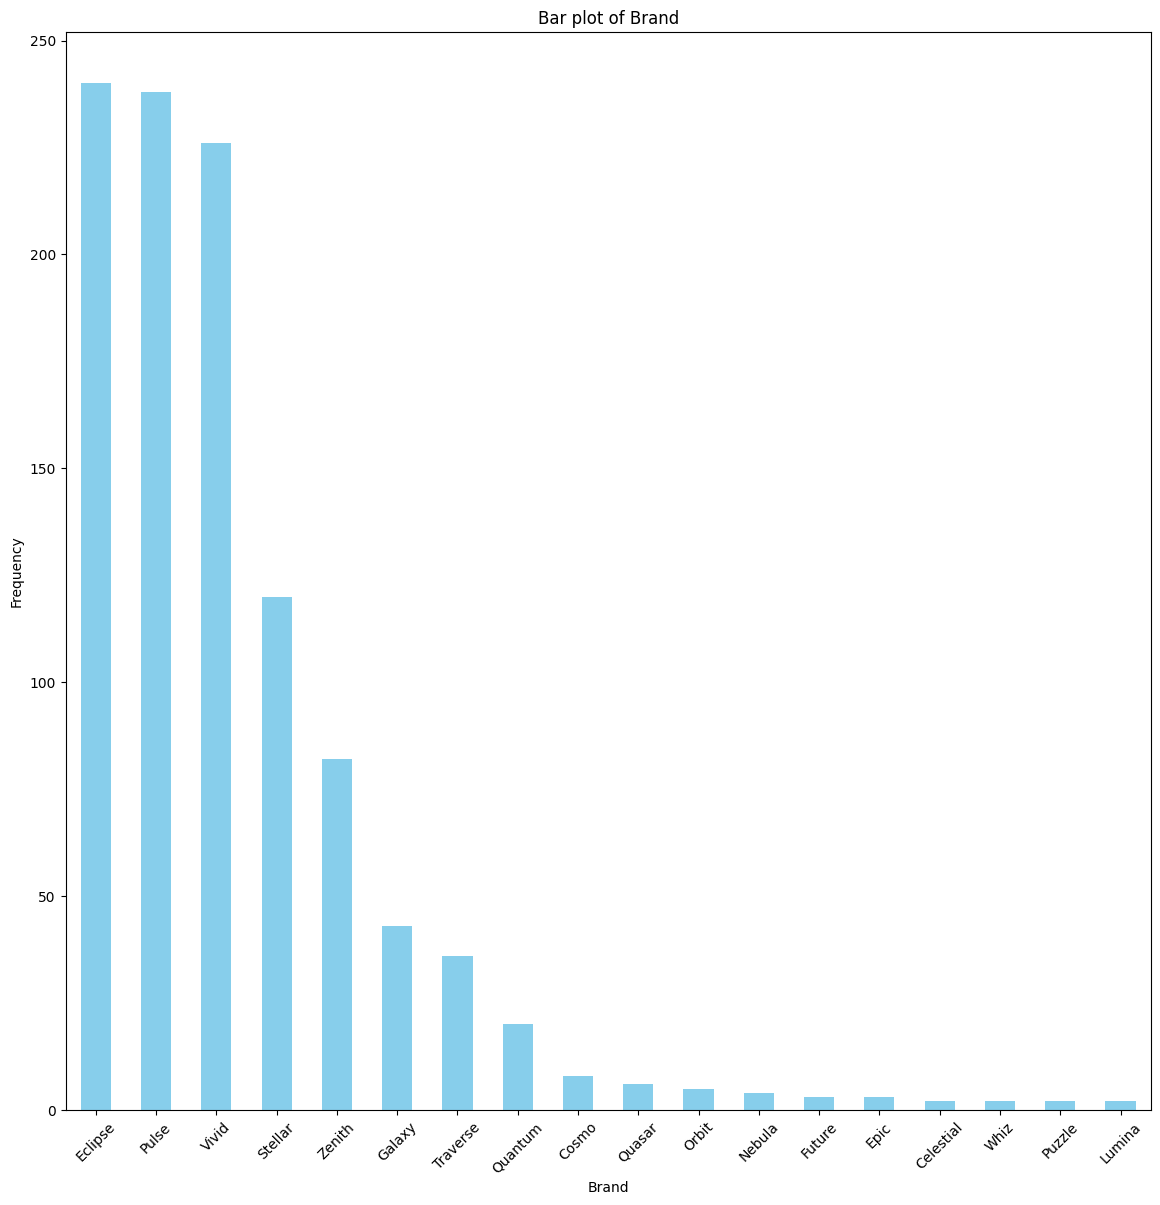

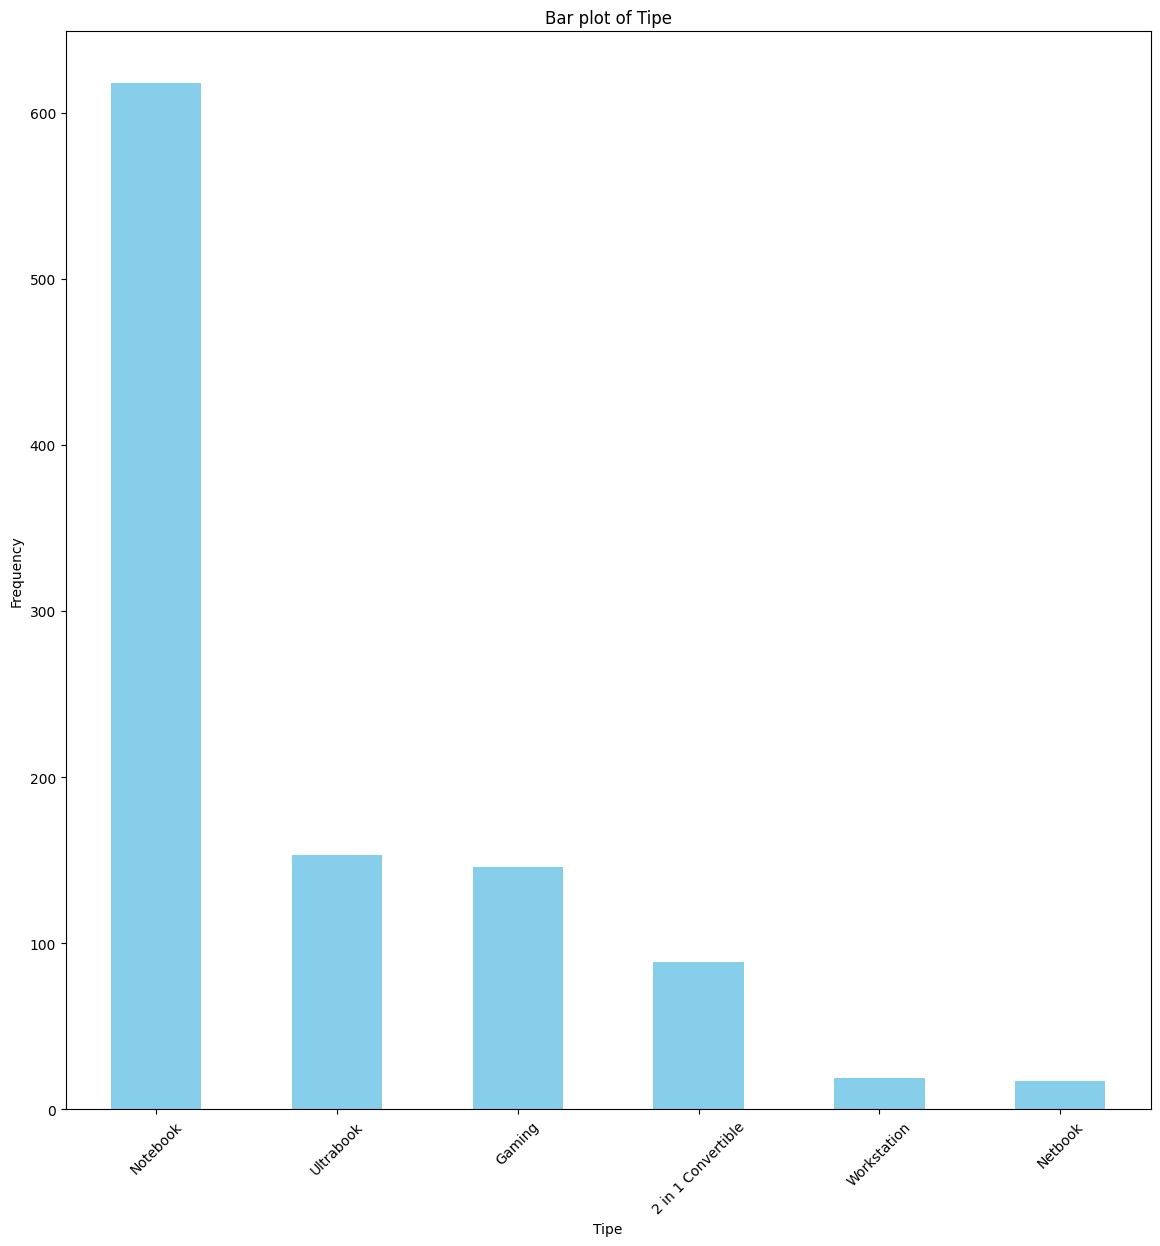

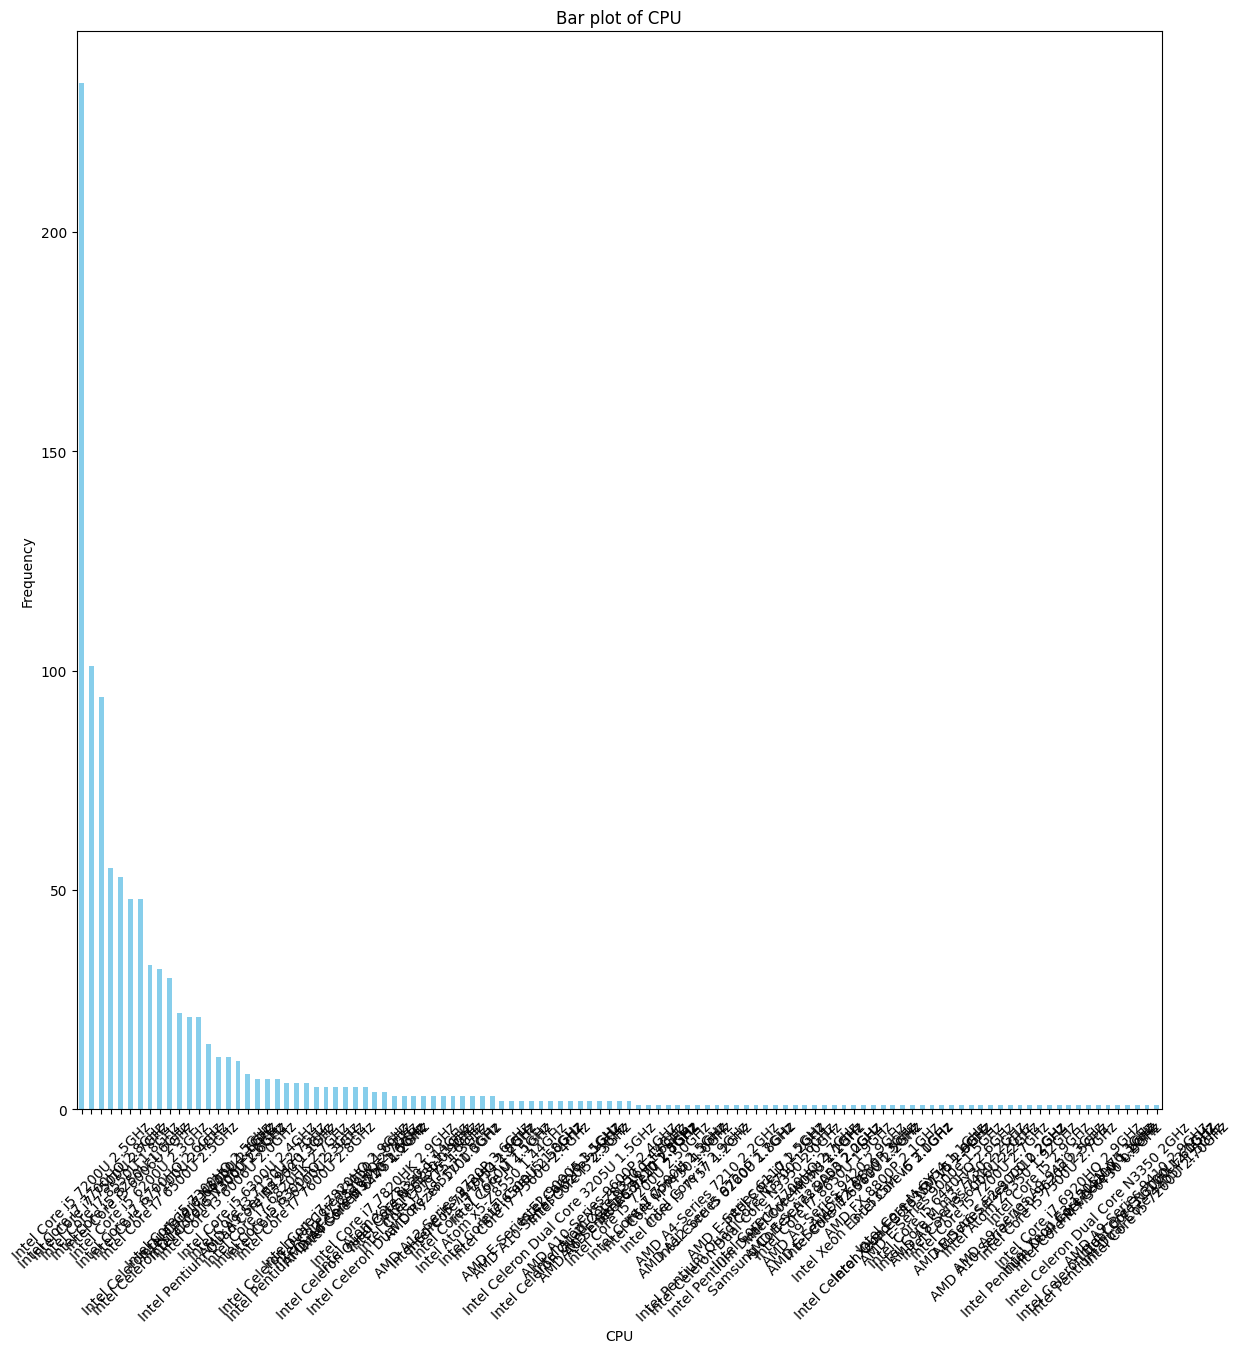

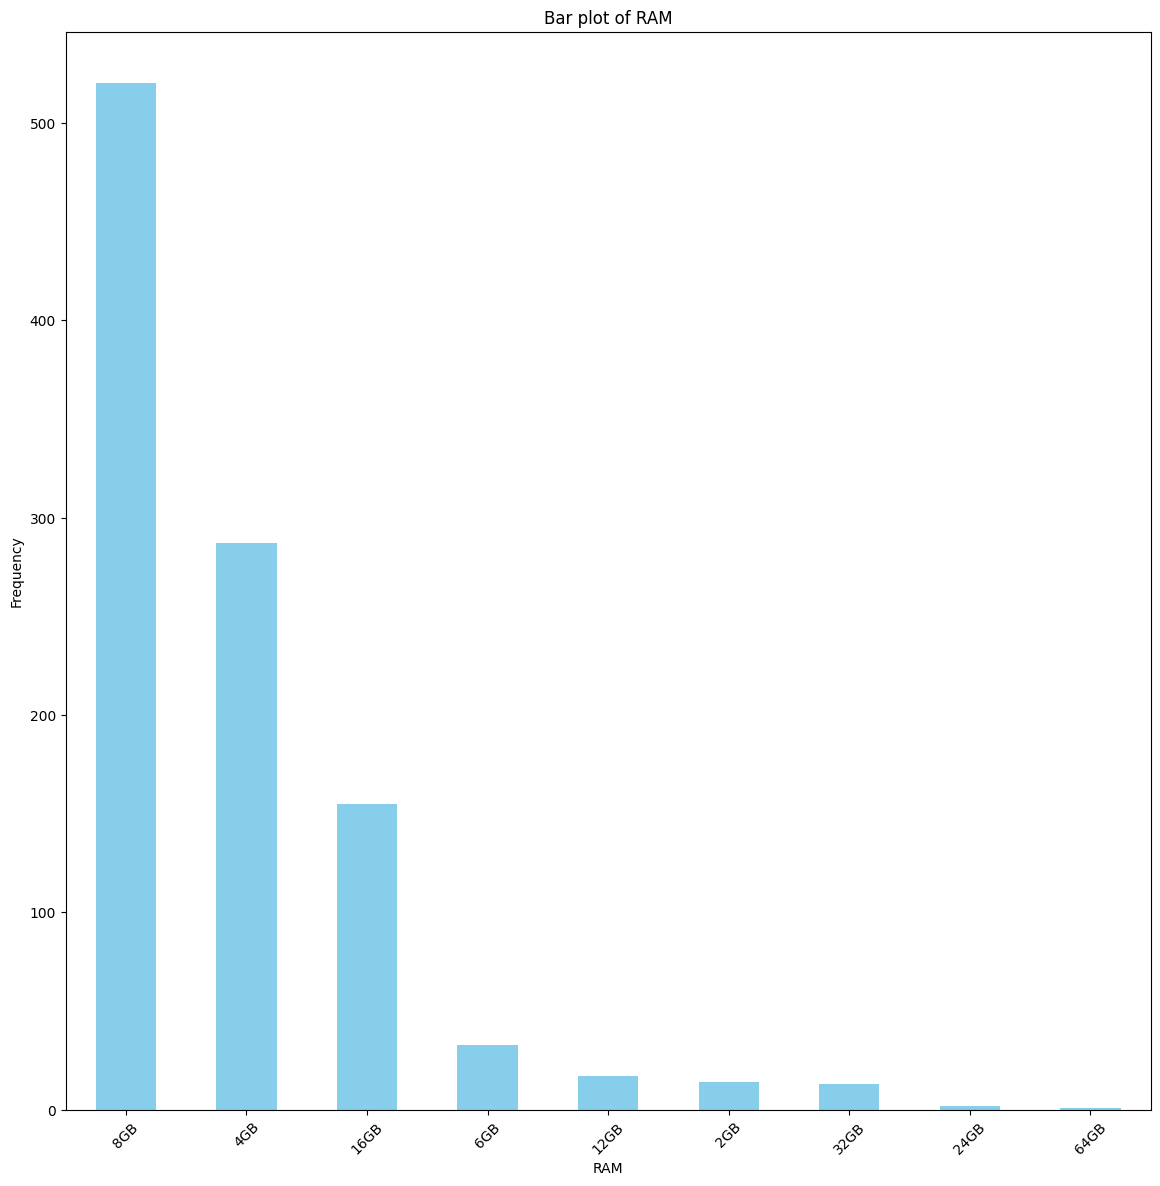

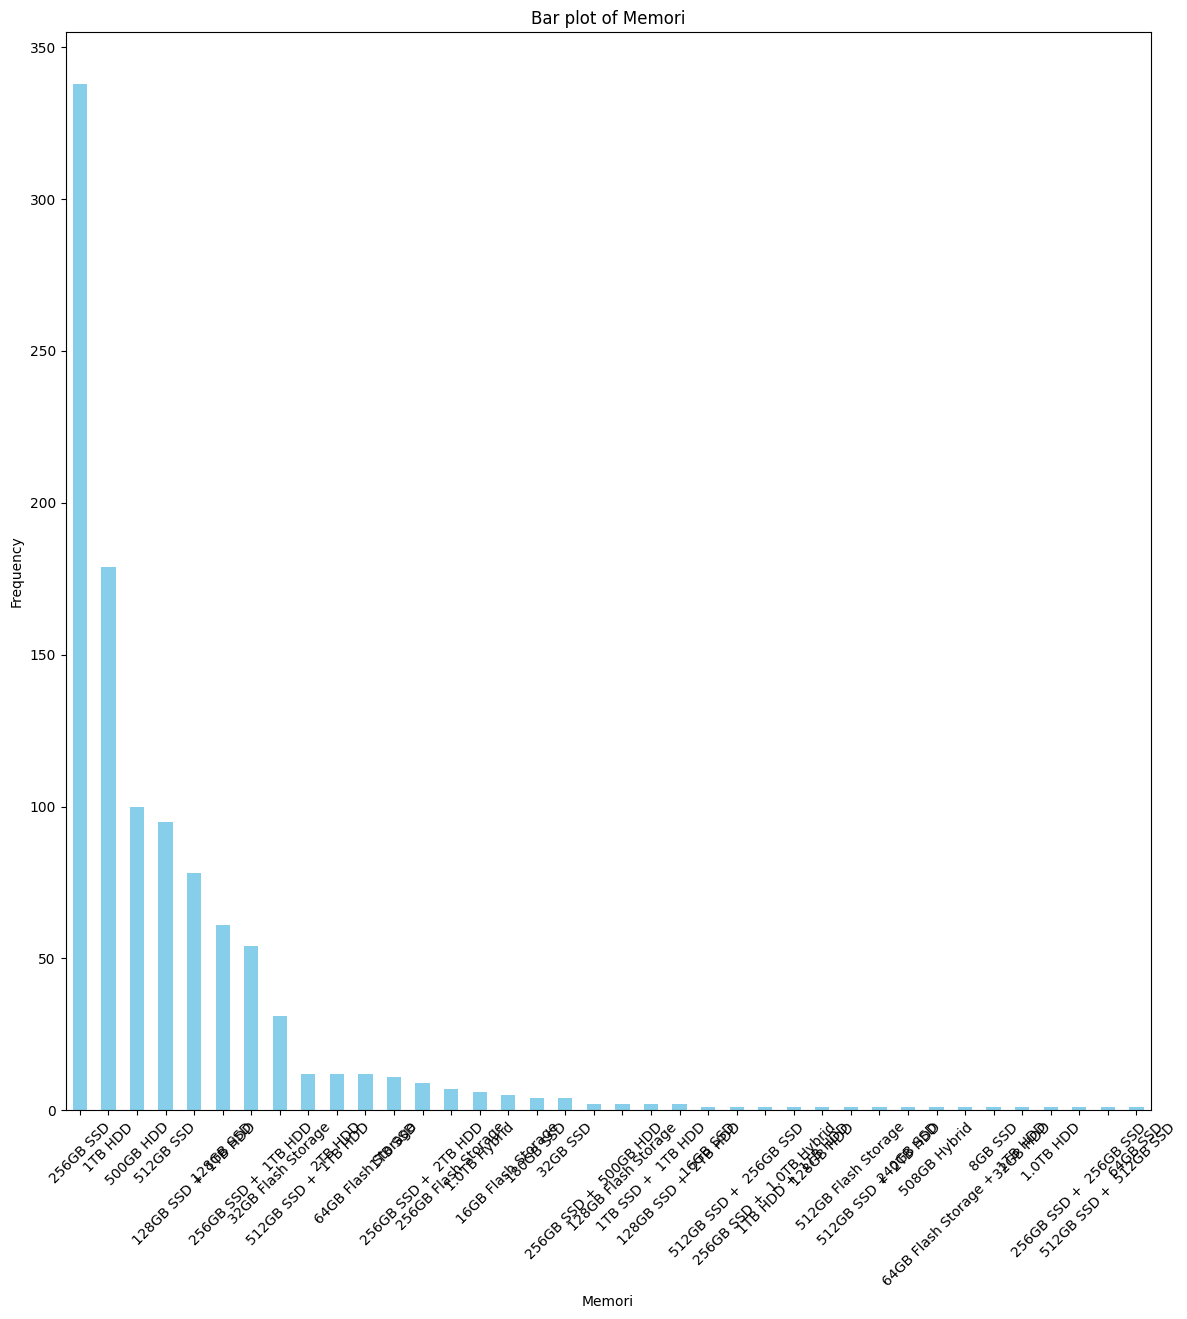

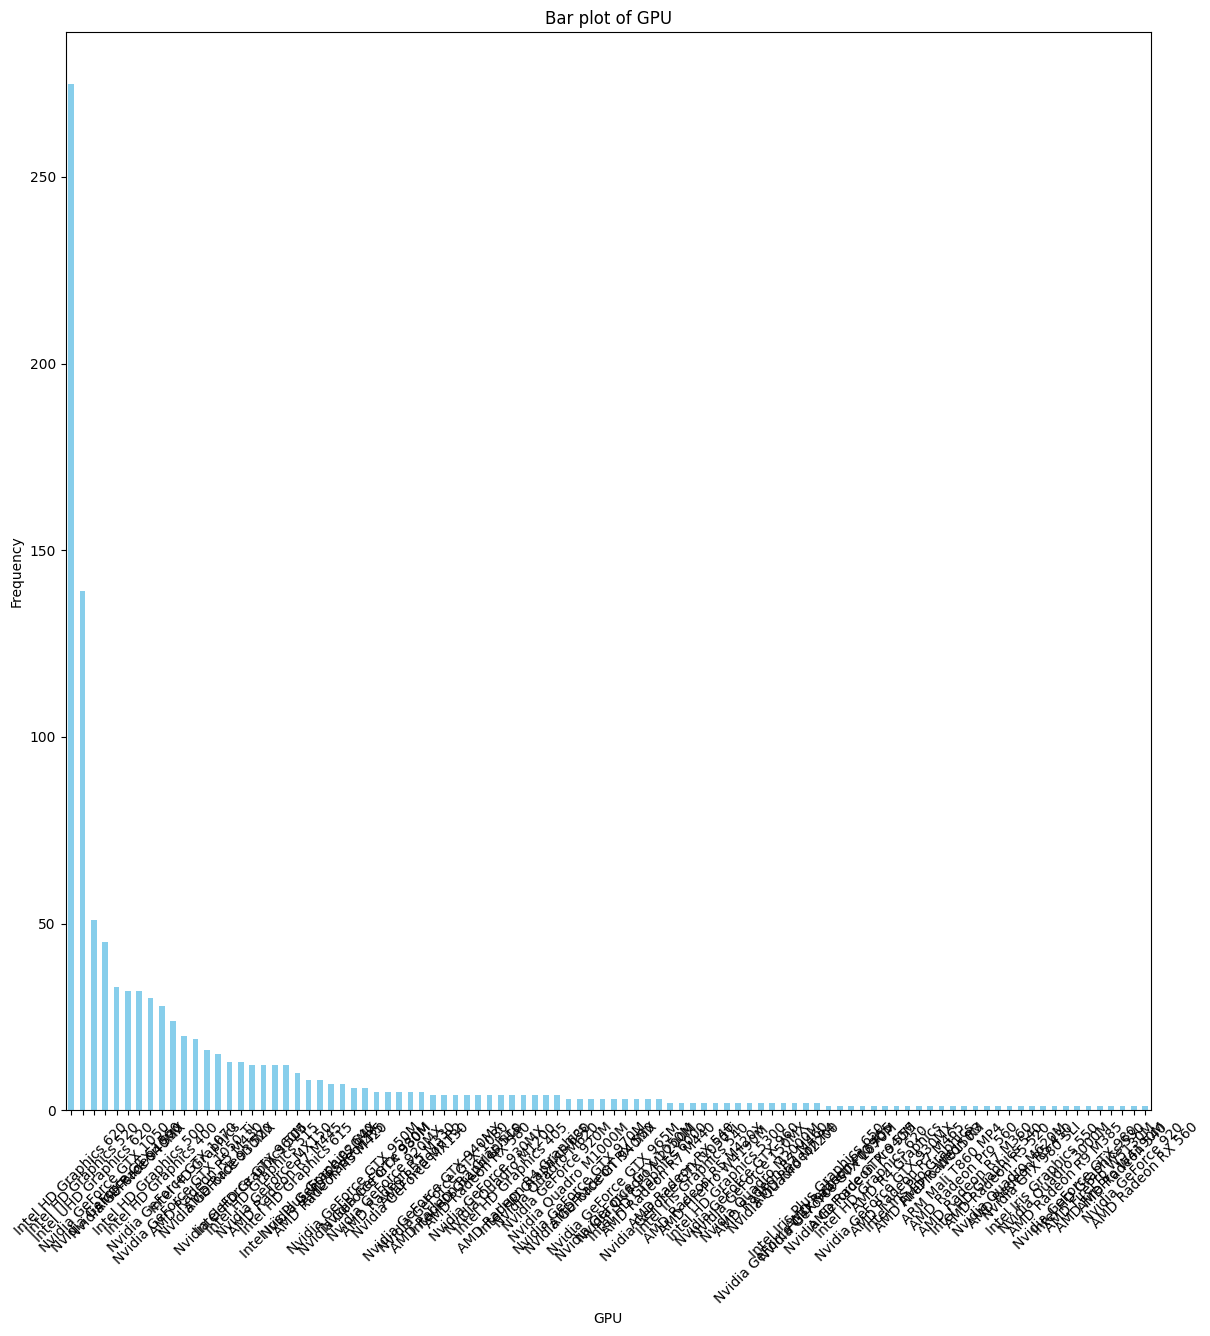

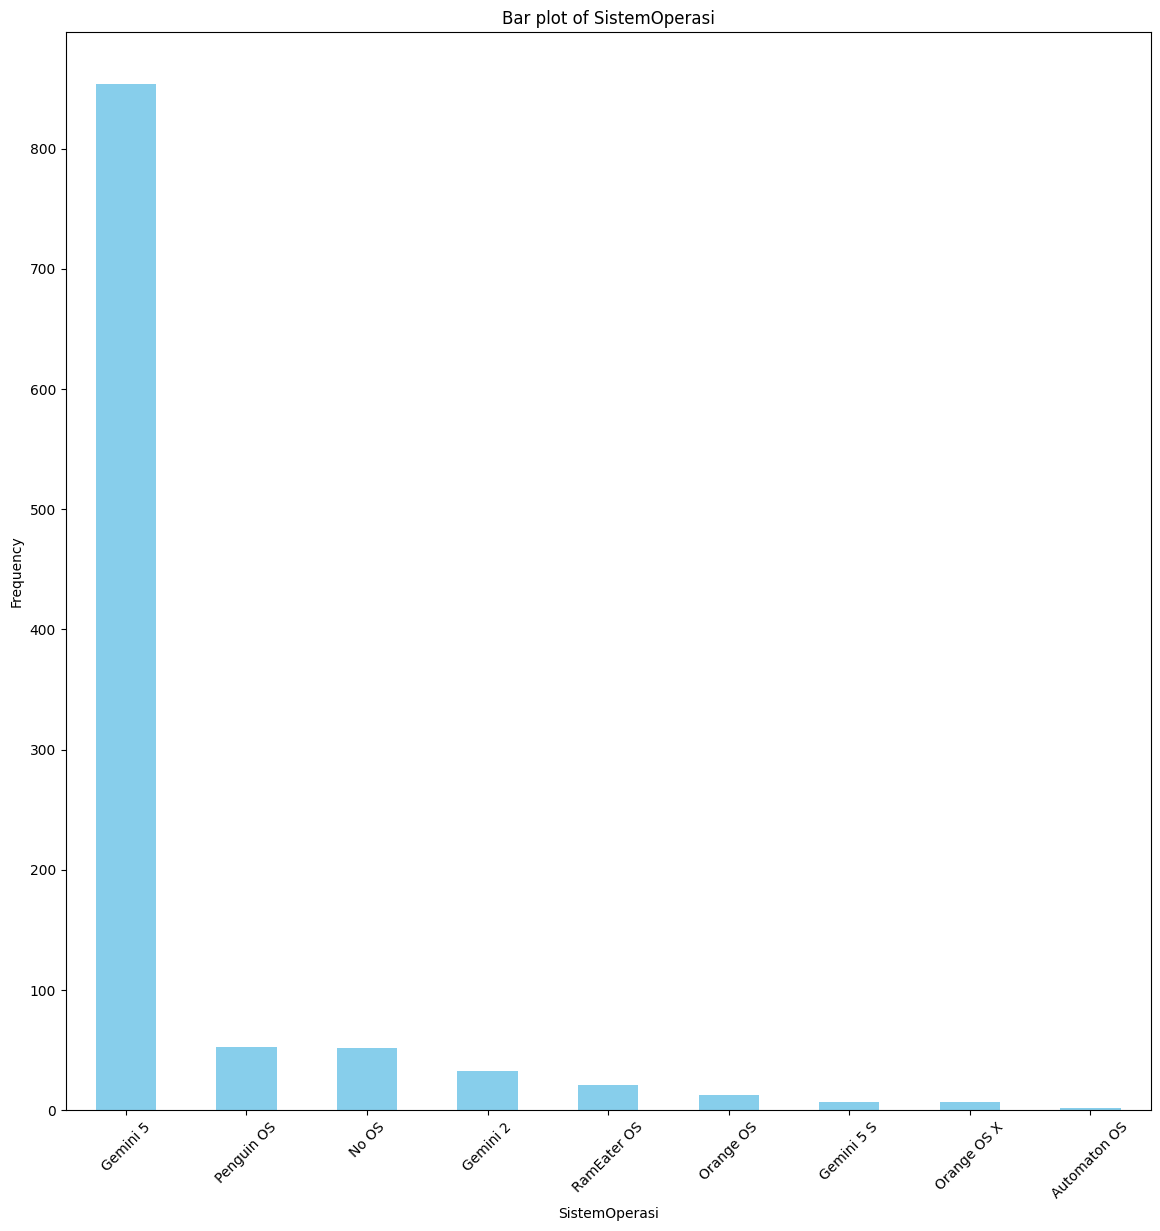

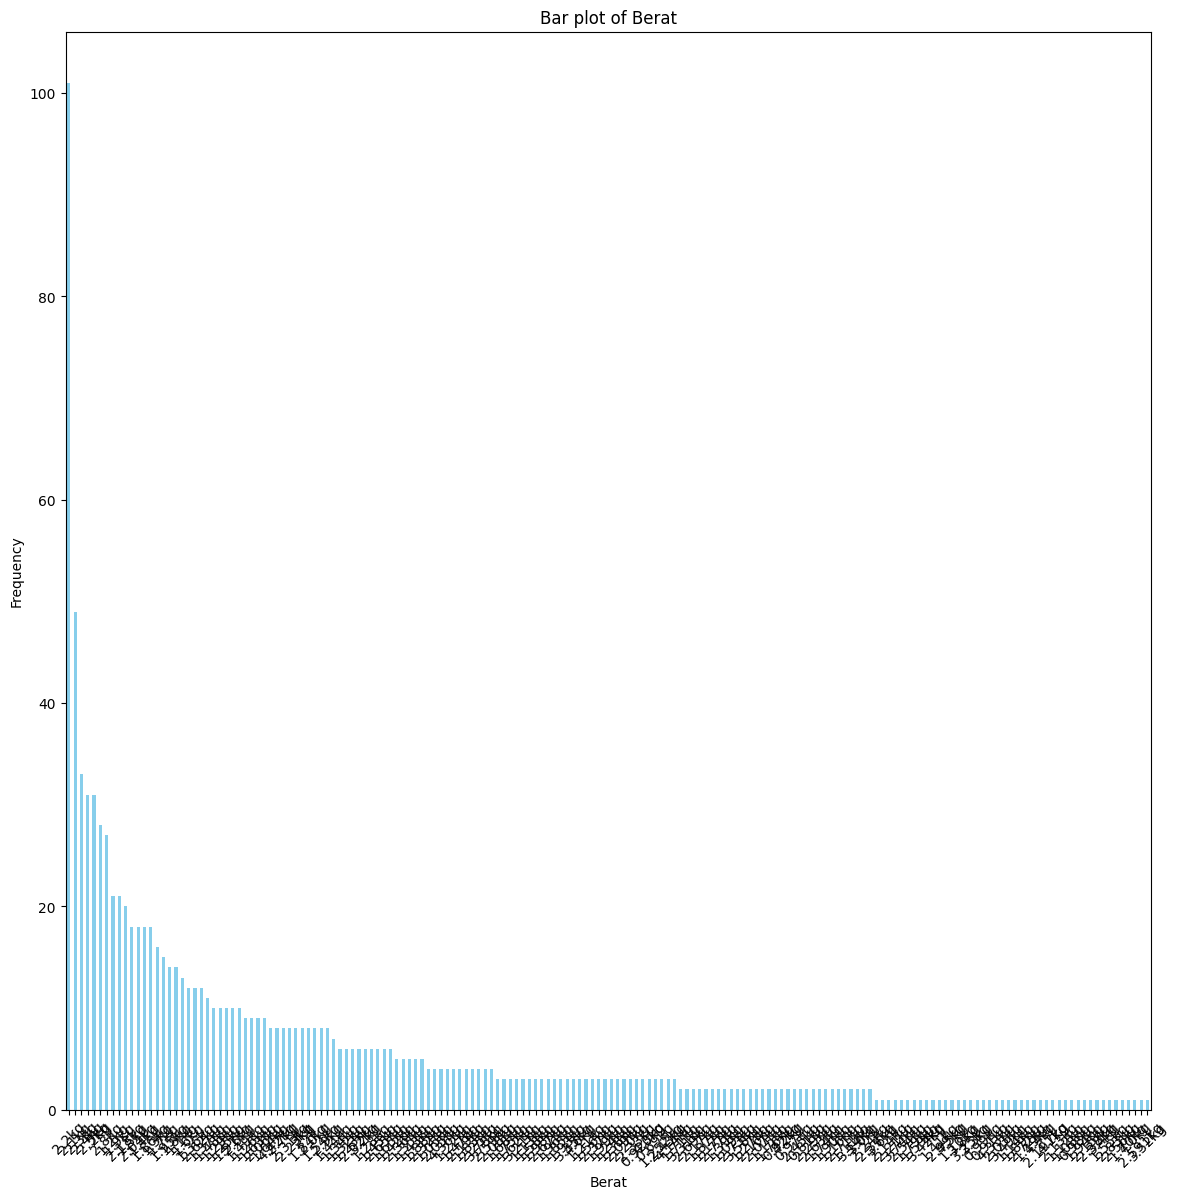

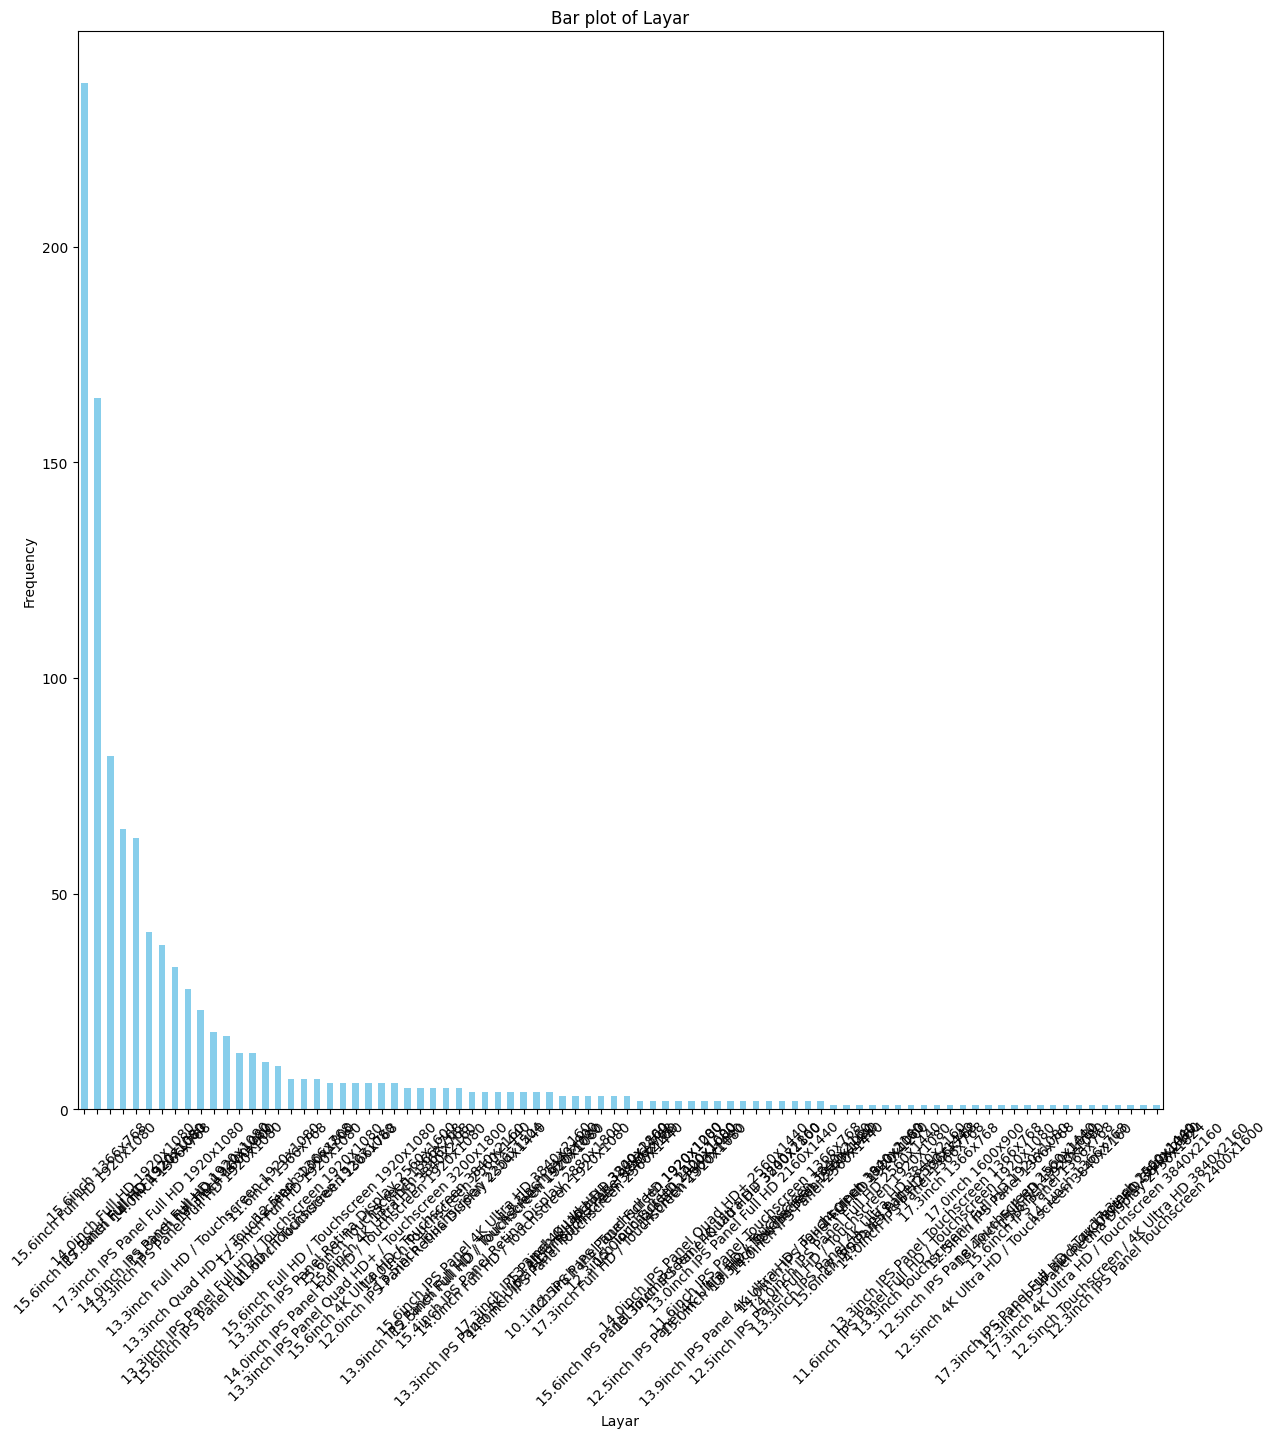

<ipython-input-6-a1c07641b135>:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train_copy[column], shade=True, color='lightcoral')


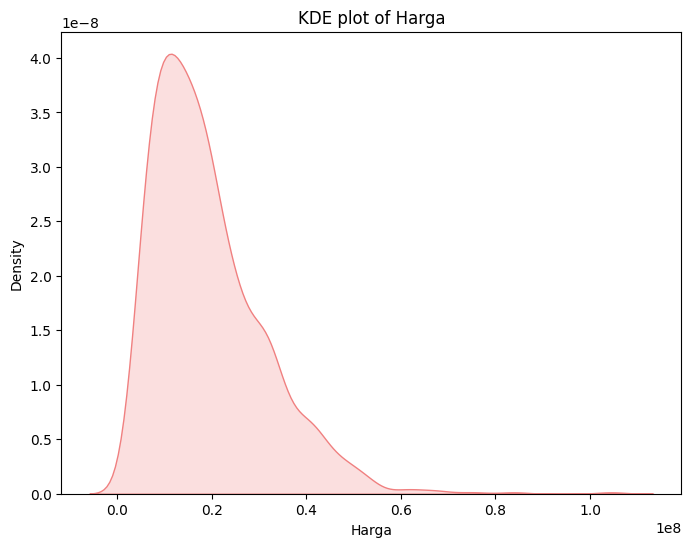

In [6]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors

import pandas as pd

# Assuming train is your original DataFrame
train_copy = train.copy()

# Fill missing values in the original DataFrame
for column in train_copy.columns:
    if train_copy[column].dtype == 'object':  # Check if the column is categorical
        mode = train_copy[column].mode()[0]  # Calculate the mode
        train_copy[column] = train_copy[column].fillna(mode)  # Fill missing values with mode


object_cols = []
for col in train_copy.columns:
    if train_copy[col].dtype == "object":
        print(col)
        object_cols.append(col)

for column in train_copy.columns:
    if train_copy[column].dtype == 'object':  # Check if the column is categorical
        plt.figure(figsize=(14, 14))
        train_copy[column].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Bar plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.show()
    else:  # Numerical variable
        plt.figure(figsize=(8, 6))
        sns.kdeplot(data=train_copy[column], shade=True, color='lightcoral')
        plt.title(f'KDE plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.show()

After imputing the missing values with mode imputation, every column
  is then graphed using a barplot for categorical values, and kdeplot for
  integer or float values. It can be observed that every column has a negative skew, which means its
  data distribution is uneven. This applies to both categorical and numerical
  value (with the exception of ID as index).

##Apa itu features dan target? Apa features dan target di dataset ini?
Target is the values that the model is trying to learn and possibly predict.
  It does that by recognizing patterns and correlations inside the features,
  through lengthy process of data preprocessing and training.

  Features are variables or columns of the dataset, that are taken into
  consideration as input data, to be calculated by the model used to make
  prediction on the target variable.

  In this case, the features are:


*   'ID' (it simply acts as index for the rows, it will be dropped during
      preprocessing).
*   'Brand'
*   'Tipe' (type)
*   'CPU'
*   'RAM'
*   'Memori'
*   'GPU'
*   'SistemOperasi'(Operating system)
*   'Berat' (weight)
*   'Layar' (screen)

As for the target, it is the column 'Harga' or price . The model is trying
    to predict the price of the laptop by calculating inputs from the mentioned
    features.






##Apakah kolom-kolom dataset dapat langsung dianalisis? Atau perlu dilakukan pemrosesan terlebih dahulu?

Columns could not immediately be analyzed, as there are missing values in
  the data, which needs to be addressed first, in order to do an accurate
  analysis. The imputation method that was chosen was mode imputation, as it
  will preserve the data type of object, while still maintaining natural data
  distribution. It is also proof against outliers from other parts of the
  dataset as the process of preprocess, modelling, and training goes.

##Apakah nama Brand berpengaruh terhadap harga laptop? Apakah ada Brand tertentu yang rerata harganya di atas Brand lain?

In [7]:
df = pd.DataFrame(train)

# Calculate average price for each brand
average_price_per_brand = df.groupby('Brand')['Harga'].mean()

# Sort brands by average price in descending order
sorted_brands = average_price_per_brand.sort_values(ascending=False)

# Print the ranking of brands
print("Ranking of Brands by Average Price:")
for rank, (brand, average_price) in enumerate(sorted_brands.iteritems(), start=1):
    print(f"{rank}. {brand}: {average_price:.2f}")

Ranking of Brands by Average Price:
1. Quasar: 51178994.67
2. Lumina: 35960068.00
3. Puzzle: 32191028.00
4. Galaxy: 30334441.13
5. Orbit: 29415130.04
6. Quantum: 27042151.02
7. Celestial: 24395968.00
8. Cosmo: 23817763.00
9. Traverse: 20783019.56
10. Eclipse: 20239362.90
11. Nebula: 19418479.55
12. Stellar: 18528777.67
13. Vivid: 18360979.94
14. Pulse: 18196788.35
15. Future: 12489228.00
16. Zenith: 10746425.16
17. Whiz: 5978211.40
18. Epic: 3481793.47


<ipython-input-7-1bd90743c9f3>:11: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rank, (brand, average_price) in enumerate(sorted_brands.iteritems(), start=1):


As shown above, brands do have an affect on the pricing of the laptops, with
  'Quasar' brand being the most expensive out of all brands. Quantitatively
  speaking, the correlation value is only about 0.39 (After the data has been
  encoded with "Leave-One-Out" encoding).

##Semakin besar ukuran RAM yang digunakan, apakah semakin tinggi harga laptop atau sebaliknya? (Dapat dijelaskan alasannya)

After handling missing values and encoding the data, the heatmap can then be
  constructed. It can be observed and concluded that both the RAM
  and the price has a direct correlation. With a correlation of 0.75, this
  shows that the higher the RAM, the higher the price by a magnitude of 0.75.

##Apa saja variabel utama yang memengaruhi harga laptop? Bagaimana korelasinya?

There are 6 key variables of price prediction for this particular
  dataset:
1.   RAM (0.75)
2.   Storage ('memori') (0.74)
3.   CPU (0.69)
4.   GPU (0.69)
5.   Screen ('Layar') (0.68)
6.   Weight ('Berat') (0.67)

All of these have a positive correlation, which means the price ('Harga')
    and all 4 of these variables are directly correated. The larger any one of
    these are, the higher the price.

While features such as brand (Brand) and operating system ('SistemOperasi')
  only trails around at 0.39 and 0.33 respectively.

The type feature ('Tipe'), in particular, has a correlation 0.58, which is
    aound halfway point. Almost as impactful as the 6 mentioned features, but
    not quite there.






## Jika ada insight lain yang menarik untuk disampaikan, tentunya dapat disertakan di bagian ini.

###Mode Imputation

Through trial and error, it was found that imputing missing values on the
  categorical data from the start with mode imputation yields a worse public
  leaderboard score.

  Without imputation: 4358340.3975
  With mode imputation: 4816207.08312

  This could probably be explained by the fact that mode imputation may not
  represent the natural overall data distribution of the column. Moreover, it
  may very well lost some information or insights as it only assumes the common
  value. The model is then only used to training with the particular mode
  of each respective variable. Therefore, it is not able to generalize to new
  data points well, other than the mode data.

  Another reason that might cause this is because the chosen encoding method,
  LeaveOneOut encoding, makes sure that it assigns value for when the value is
  missing. It blocks the categorical row and the corresponding target, and then
  calculate the rest of the target's average. And then, this average is assigned
  into the empty cell. This could be good for the model (as shown by the better
  accuracy) because it preserves the nature that the data was indeed missing;
  the encoder preserves the missingness. It treats missing values as a separate
  categories. Therefore, the model is used to dealing with empty values to make
  predcitions, and not biased.

###Scaling Problem

  Morevoer, despite having a large value range for each column, scaling the
  features do not help improve the accuracy of the model. It only yielded a
  public score of around 5 million RMSE score. This is most likely caused by the
  fact the the feature becomes less interpretable. For example, if RAM was
  scaled using minmax method, the meaning of the scaled number becomes less
  clear. It sort of takes away the natural meaning of the variable. The same
  for other variables such as storage (Memori) and weight (Berat). Another reason that might explain this occurence is the fact that the minmax scaler is negatively impacted by outliers. The compression of a large range of data into a small one makes outliers more powerful in throwing off the prediction. Its effect is more profound way before it was scaled.
  
  Furthermore, scaling also does not improve the validation accuracy of the model. Leaving the data encoded as it is yields an accuracy of about 0.85, while scaling using minmax scaler yields an accuracy of 0.84.

#Potential Improvements in The Future

Learning from the process of modeling for this task, there are some improvements that could be made to increase the model's accuracy for this particular task:


1.   A robust categorical imputation method that is better than mode imputation, for more direct and better analysis.
2.   Engineering the features by adding more columns to separate informations that are jumbled in the same column.
3.   Experiment with better encoding methods (i.e, frequency encoding, probability ratio encoding).
4.   Better parameter tuning could be done with better hardware (such as increasing the n-estimator for more rounds of training for the model).
5.   Experiment with different machine learning or deep learning models (SVM, RandomForest, layered sequential deep learning, etc).
6.   Apply better regularization techniques (alpha, lambda, gamma) to prevent overfitting.



##Encode categorical columns for better analysis and training

Find Object Columns

In [8]:
#Find object columns
object_cols = []
for col in train.columns:
    if train[col].dtype == "object":
        print(col)
        object_cols.append(col)

Brand
Tipe
CPU
RAM
Memori
GPU
SistemOperasi
Berat
Layar


Leave-One-Out Encoding to ensure as much data is included as possible


In [9]:
train.shape
train.isnull().sum()

ID                0
Brand             0
Tipe             63
CPU              94
RAM              31
Memori            0
GPU              63
SistemOperasi    31
Berat             0
Layar             0
Harga             0
dtype: int64

In [10]:
import category_encoders as ce

# Create an instance of LeaveOneOutEncoder
encoder = ce.LeaveOneOutEncoder(cols=object_cols)

# Fit encoder on training data
encoder.fit(train[object_cols], train['Harga'])

# Perform leave-one-out encoding on training data
data_encoded = encoder.transform(train[object_cols])

# Perform leave-one-out encoding on test data
test_encoded = encoder.transform(test[object_cols])

# Merge the encoded data with the original dataframe
data = train.merge(data_encoded, how='left', left_index=True, right_index=True)
test = test.merge(test_encoded, how='left', left_index=True, right_index=True)

###Reason for choosing LeaveOneOut Encoding

This encoding method makes sure to treat missing values as a separate category, which preserves the natural missingness of the value, and therefore less biases learned.

Furthermore, it also prevents data leakage as it takes the data that is being encoded out of the consideration. This reduces the effect of the data that is being encoded on the prediction. Thus, the model learns from the overall objective value of price in the dataset, rather than being influenced or dictated by what the current data has to say, which can lead to biases.

And lastly, this method of encoding ensures that all of the categorical data are included for the model to be trained, without creating a sparse matrix from One-Hot encoding, or using ordinal encoding that is heavily based on order (which is not so clear for some features in this dataset).

In [11]:
data.head()

,ID,Brand_x,Tipe_x,CPU_x,RAM_x,Memori_x,GPU_x,SistemOperasi_x,Berat_x,Layar_x,Harga,Brand_y,Tipe_y,CPU_y,RAM_y,Memori_y,GPU_y,SistemOperasi_y,Berat_y,Layar_y
0,0,Pulse,NaN,Intel Core i3 7100U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 620,Gemini 5,1.4kg,13.3inch IPS Panel Full HD 1920x1080,16258268.00,1.819679e+07,1.915661e+07,1.030306e+07,2.003583e+07,2.094000e+07,1.921456e+07,2.015824e+07,1.687524e+07,1.648718e+07
1,1,Pulse,Notebook,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Gemini 2,2.32kg,15.6inch Full HD 1920x1080,14133900.00,1.819679e+07,1.352680e+07,2.217181e+07,9.875304e+06,1.345282e+07,1.779383e+07,2.862555e+07,1.286403e+07,1.636812e+07
2,2,Zenith,2 in 1 Convertible,NaN,8GB,256GB SSD,Intel HD Graphics 520,Gemini 5,1.6kg,13.3inch IPS Panel Full HD / Touchscreen 1920x...,13517319.32,1.074643e+07,2.233282e+07,2.065190e+07,2.003583e+07,2.094000e+07,1.779383e+07,2.015824e+07,1.628481e+07,2.213905e+07
3,3,Vivid,Notebook,NaN,4GB,500GB HDD,Intel HD Graphics 400,No OS,1.86kg,15.6inch 1366x768,4437188.00,1.836098e+07,1.352680e+07,2.065190e+07,9.875304e+06,1.095524e+07,5.412855e+06,9.845424e+06,7.264596e+06,8.755663e+06
4,4,Zenith,Notebook,Intel Core i3 6006U 2GHz,NaN,500GB HDD,Nvidia GeForce GTX 940MX,Gemini 5,2.2kg,15.6inch 1366x768,8034908.00,1.074643e+07,1.352680e+07,8.346857e+06,1.682562e+07,1.095524e+07,1.060471e+07,2.015824e+07,1.183348e+07,8.755663e+06


In [12]:
test.head()

,ID,Brand_x,Tipe_x,CPU_x,RAM_x,Memori_x,GPU_x,SistemOperasi_x,Berat_x,Layar_x,Brand_y,Tipe_y,CPU_y,RAM_y,Memori_y,GPU_y,SistemOperasi_y,Berat_y,Layar_y
0,0,Pulse,Gaming,Intel Core i7 6820HK 2.7GHz,32GB,512GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Gemini 5,4.6kg,17.3inch IPS Panel Full HD 1920x1080,1.819679e+07,2.964384e+07,3.816187e+07,5.711162e+07,1.919699e+07,3.444280e+07,2.015824e+07,4.398915e+07,3.328641e+07
1,1,Vivid,Notebook,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,1.86kg,15.6inch 1366x768,1.836098e+07,1.352680e+07,8.346857e+06,9.875304e+06,1.095524e+07,1.779383e+07,9.845424e+06,7.264596e+06,8.755663e+06
2,2,Eclipse,Notebook,Intel Pentium Quad Core N3710 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Gemini 5,2.2kg,15.6inch 1366x768,2.023936e+07,1.352680e+07,7.305085e+06,9.875304e+06,1.095524e+07,7.322659e+06,2.015824e+07,1.183348e+07,8.755663e+06
3,3,Orbit,Ultrabook,Intel Core i5 7200U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 620,Gemini 5 S,1.252kg,13.5inch Touchscreen 2256x1504,2.941513e+07,2.640434e+07,1.571321e+07,9.875304e+06,1.196486e+07,1.921456e+07,2.252329e+07,2.396681e+07,2.941513e+07
4,4,Pulse,Ultrabook,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Gemini 5,1.36kg,12.5inch IPS Panel Full HD 1920x1080,1.819679e+07,2.640434e+07,2.228493e+07,2.003583e+07,2.094000e+07,1.921456e+07,2.015824e+07,2.992989e+07,2.974115e+07


Drop the original object columns and ID column

In [13]:
for col in data.columns:
    if data[col].dtype == 'object':
        data.drop(columns=[col], inplace=True)
        test.drop(columns=[col], inplace=True)

data.drop(columns=['ID'], inplace=True)
test.drop(columns=['ID'], inplace=True)
data.head()
data.shape

(1042, 10)

In [14]:
data.head()

,Harga,Brand_y,Tipe_y,CPU_y,RAM_y,Memori_y,GPU_y,SistemOperasi_y,Berat_y,Layar_y
0,16258268.00,1.819679e+07,1.915661e+07,1.030306e+07,2.003583e+07,2.094000e+07,1.921456e+07,2.015824e+07,1.687524e+07,1.648718e+07
1,14133900.00,1.819679e+07,1.352680e+07,2.217181e+07,9.875304e+06,1.345282e+07,1.779383e+07,2.862555e+07,1.286403e+07,1.636812e+07
2,13517319.32,1.074643e+07,2.233282e+07,2.065190e+07,2.003583e+07,2.094000e+07,1.779383e+07,2.015824e+07,1.628481e+07,2.213905e+07
3,4437188.00,1.836098e+07,1.352680e+07,2.065190e+07,9.875304e+06,1.095524e+07,5.412855e+06,9.845424e+06,7.264596e+06,8.755663e+06
4,8034908.00,1.074643e+07,1.352680e+07,8.346857e+06,1.682562e+07,1.095524e+07,1.060471e+07,2.015824e+07,1.183348e+07,8.755663e+06


In [15]:
test.head()

,Brand_y,Tipe_y,CPU_y,RAM_y,Memori_y,GPU_y,SistemOperasi_y,Berat_y,Layar_y
0,1.819679e+07,2.964384e+07,3.816187e+07,5.711162e+07,1.919699e+07,3.444280e+07,2.015824e+07,4.398915e+07,3.328641e+07
1,1.836098e+07,1.352680e+07,8.346857e+06,9.875304e+06,1.095524e+07,1.779383e+07,9.845424e+06,7.264596e+06,8.755663e+06
2,2.023936e+07,1.352680e+07,7.305085e+06,9.875304e+06,1.095524e+07,7.322659e+06,2.015824e+07,1.183348e+07,8.755663e+06
3,2.941513e+07,2.640434e+07,1.571321e+07,9.875304e+06,1.196486e+07,1.921456e+07,2.252329e+07,2.396681e+07,2.941513e+07
4,1.819679e+07,2.640434e+07,2.228493e+07,2.003583e+07,2.094000e+07,1.921456e+07,2.015824e+07,2.992989e+07,2.974115e+07


##EDA and Preprocessing

Observe outliers using boxplot

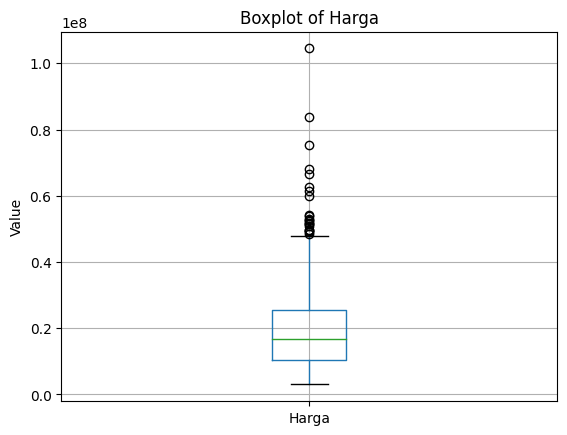

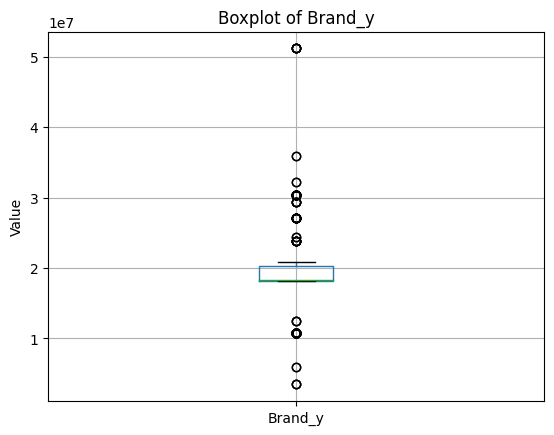

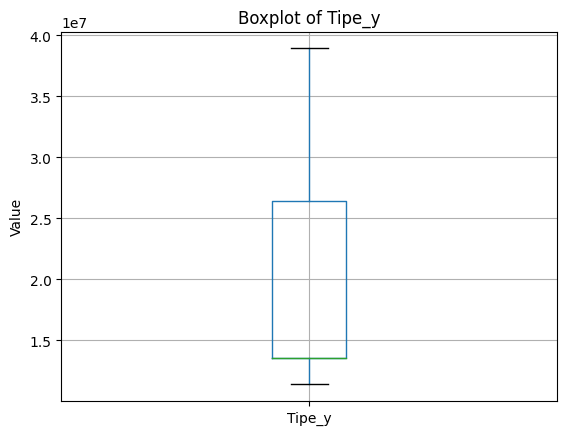

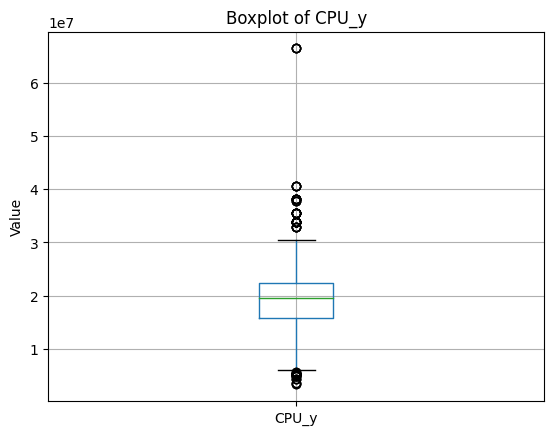

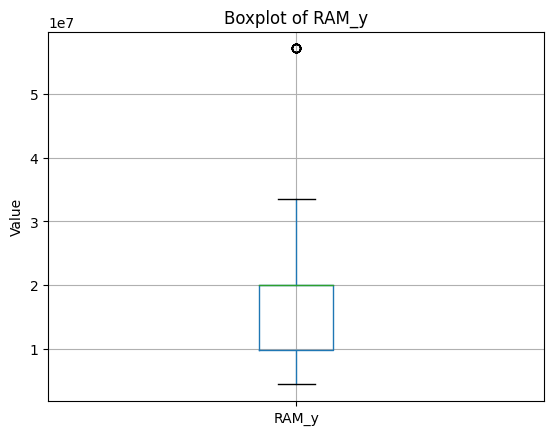

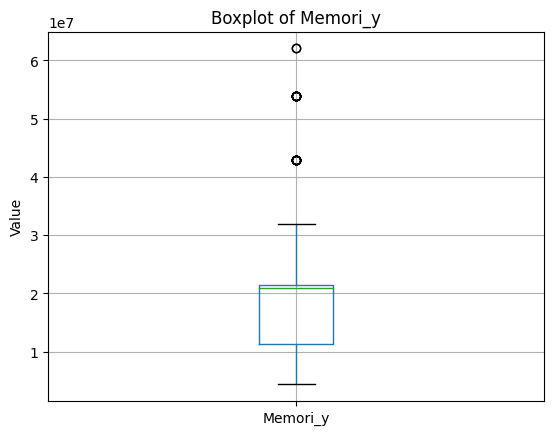

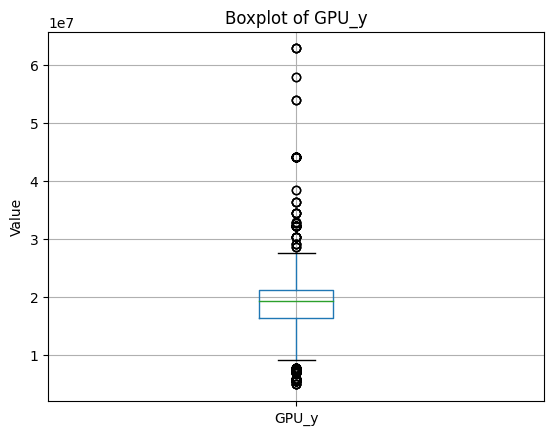

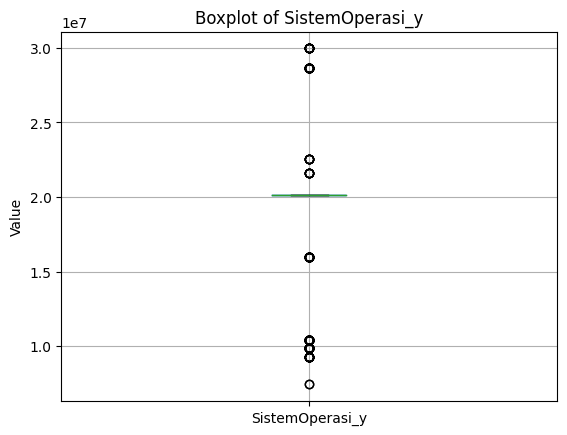

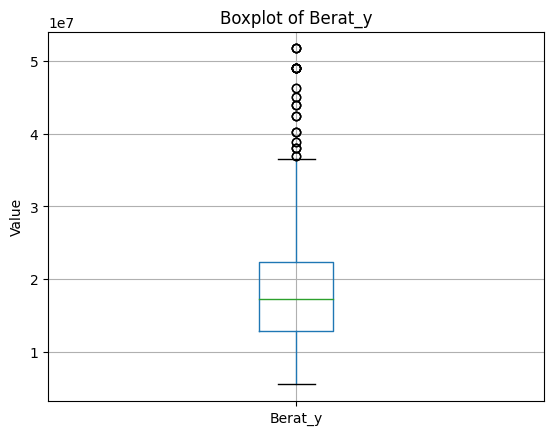

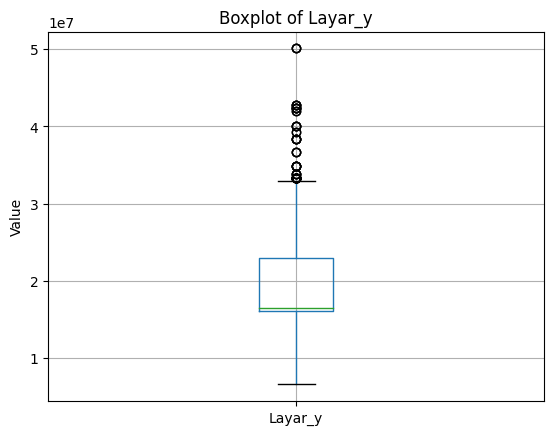

In [16]:
for column in data.columns:
    data.boxplot(column=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Value')
    plt.show()

#Explanation about the boxplot
The boxplot is illustrated using the IQR method of eliminating outliers.
Through trial and error, it was found that eliminating data points using IQR method yields a worse results on the prediction, with an RMSE of only around 11 million.

This is potentially caused by the number of rows that were eliminated, with around 570 rows, more than half of the whole data point (1042 data points). This takes away the model's ability to learn because it lacks the data to learn.

The same applies when applying Z-Score method with to the whole dataset various threshold (threshold 6-8), with the public RMSE score improving as the threshold goes up. High threshold means that there are less data points that are considered outliers, meaning the less the data is dropped, the better is the score.

This can be explained by the fact that z-score only works well with evenly distributed data, while the given variables in the dataset mostly have a negative skew. The very concept of threshold of z-score was drawn on an evenly distributed data

Or in short, the model underfits due to the lack of data points.

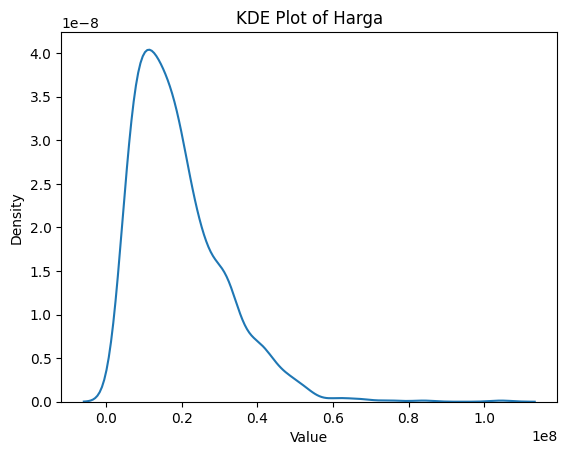

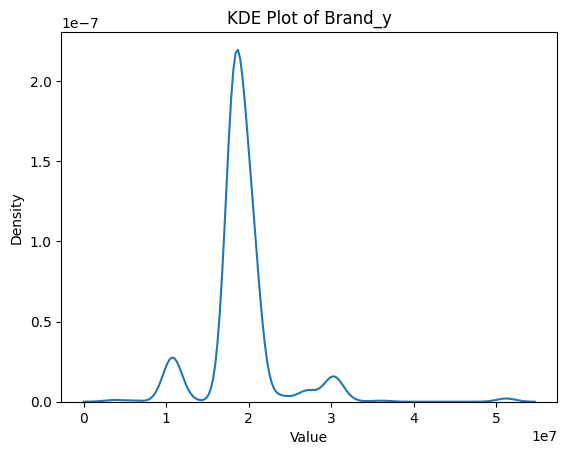

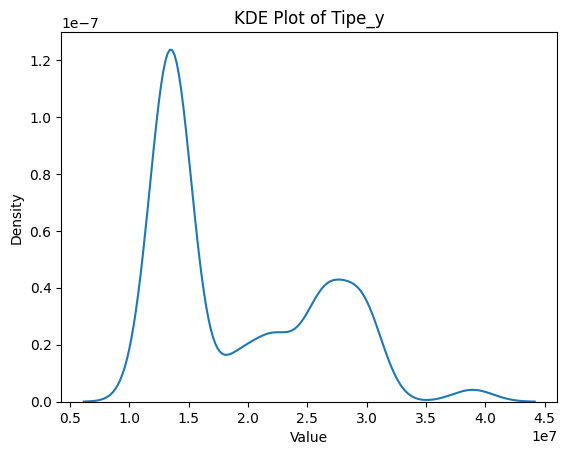

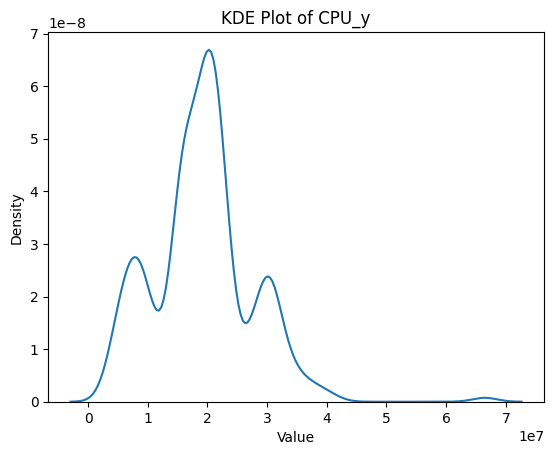

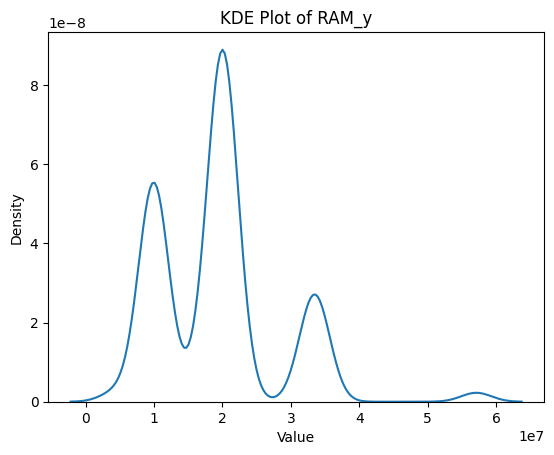

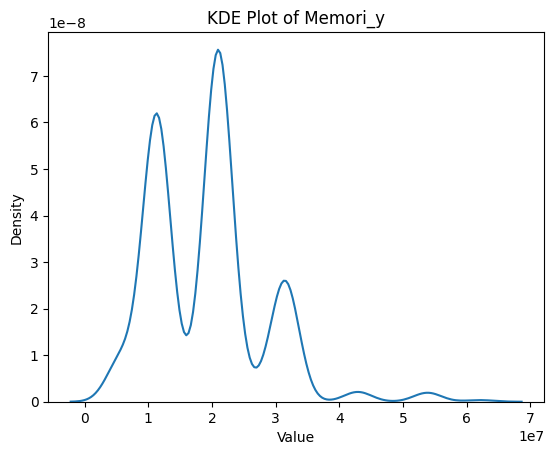

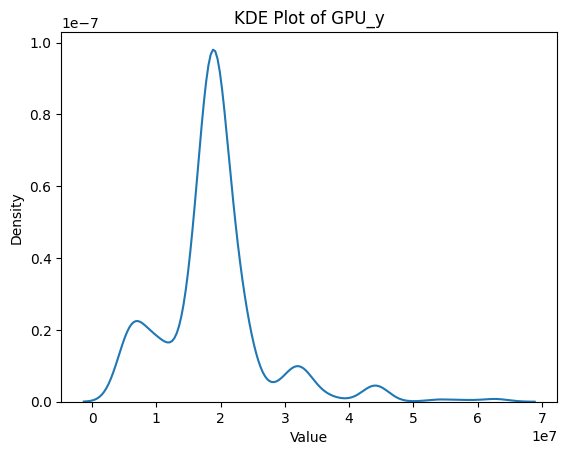

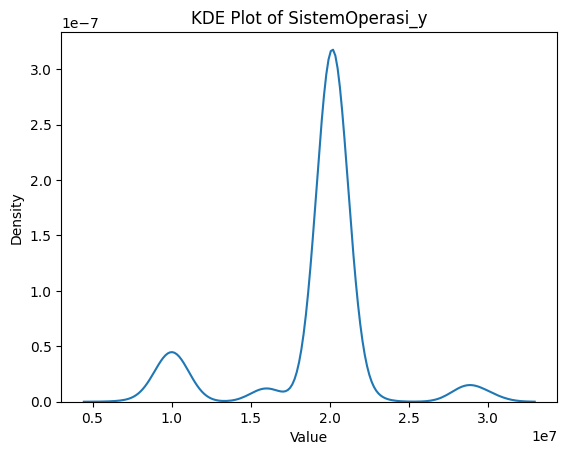

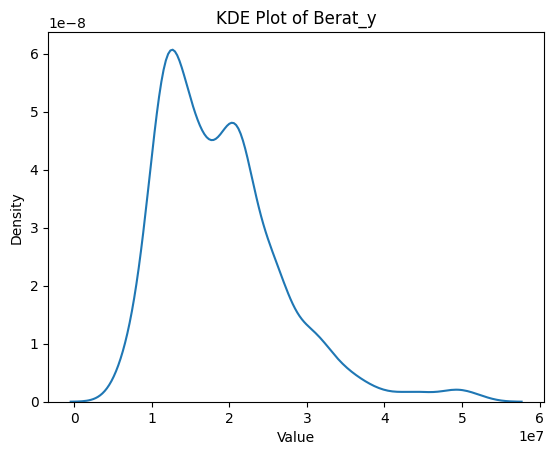

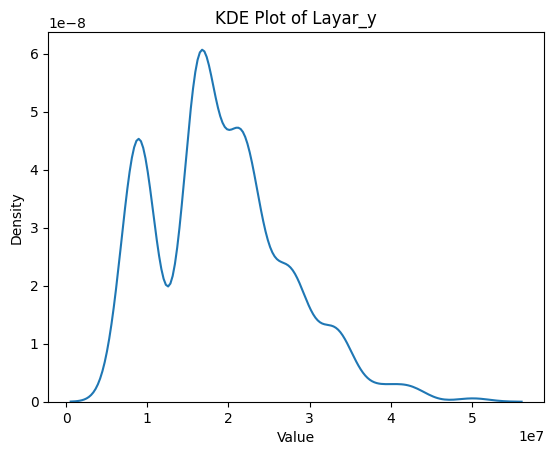

In [17]:
for column in data.columns:
    sns.kdeplot(data[column])
    plt.title(f'KDE Plot of {column}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

##Explanation about the kdeplot
It can be observed that most of the features have a negatve skew. This also contributes to the explanation for why mode imputation does not work. In a numerical data, median imputation works best, as it is simply the middle value of the data, and it is less affected by outliers (unlike mean method). However, this is a categorical data, and the kdeplot displays a LeaveOneOut-encoded data.

Find Correlations using Heatmaps

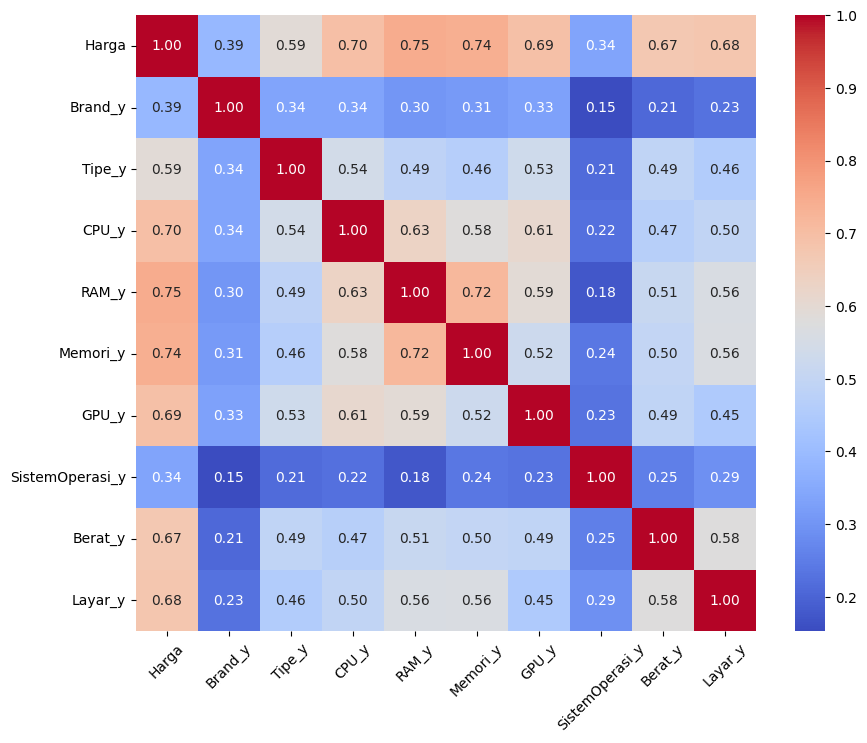

In [18]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()

##Explanation about heatmap
These are shows a map of correlation between all possible relationship between all variables. We are mostly concerned with the row where it says 'Harga' as that shows how much each variable is correlated with the target. All of the features have a significant relationship with the price, with correlations that are more than 30%. From this, we can conclude that no features are worth dropping.

Find columns with missing values

In [19]:
# Assuming 'data' is your DataFrame
for column in data.columns:
    if data[column].isnull().any():
        print(f"Column '{column}' has missing values.")

Find out how many missing values

In [20]:
for column in data.columns:
    missing_count = data[column].isnull().sum()
    if missing_count > 0:
        print(f"Column '{column}' has {missing_count} missing values.")

In [21]:
for column in data.columns:
    column_range = data[column].max() - data[column].min()
    print(f"Range of '{column}': {column_range}")

Range of 'Harga': 101507100.0
Range of 'Brand_y': 47697201.199999996
Range of 'Tipe_y': 27528378.636780187
Range of 'CPU_y': 63178533.0
Range of 'RAM_y': 52674674.11824176
Range of 'Memori_y': 57715138.2
Range of 'GPU_y': 57922469.664
Range of 'SistemOperasi_y': 22539386.338461537
Range of 'Berat_y': 46201092.193333335
Range of 'Layar_y': 43509569.333333336


(Explanation for the lack of scaling despite the high range is explained in the "EDA Questions" section of the notebook.)

##Preparing Data for Training

Separating training data from target column

In [22]:
data.head()

,Harga,Brand_y,Tipe_y,CPU_y,RAM_y,Memori_y,GPU_y,SistemOperasi_y,Berat_y,Layar_y
0,16258268.00,1.819679e+07,1.915661e+07,1.030306e+07,2.003583e+07,2.094000e+07,1.921456e+07,2.015824e+07,1.687524e+07,1.648718e+07
1,14133900.00,1.819679e+07,1.352680e+07,2.217181e+07,9.875304e+06,1.345282e+07,1.779383e+07,2.862555e+07,1.286403e+07,1.636812e+07
2,13517319.32,1.074643e+07,2.233282e+07,2.065190e+07,2.003583e+07,2.094000e+07,1.779383e+07,2.015824e+07,1.628481e+07,2.213905e+07
3,4437188.00,1.836098e+07,1.352680e+07,2.065190e+07,9.875304e+06,1.095524e+07,5.412855e+06,9.845424e+06,7.264596e+06,8.755663e+06
4,8034908.00,1.074643e+07,1.352680e+07,8.346857e+06,1.682562e+07,1.095524e+07,1.060471e+07,2.015824e+07,1.183348e+07,8.755663e+06


In [23]:
#Drop target column
X = data.drop(columns=['Harga'])
y = data['Harga']

Split the data into training and validation

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2,)

##Training the model

Search for the best parameters

In [25]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

model = XGBRegressor(random_state=42)

param_grid = {
    'booster': ['gbtree', 'gblinear'],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.001, 0.05],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [0.1, 0.5, 1, 3, 5],
    'subsample': [0.1, 0.2, 0.3, 0.4, 0.5],
    'colsample_bytree': [0.1, 0.2, 0.3, 0.4],

}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 10800 candidates, totalling 54000 fits


KeyboardInterrupt: 

Applying the best parameters to the model.

In [ ]:
# best_params = grid_search.best_params_
model = XGBRegressor(**grid_search.best_params_, reg_lpha=0.1, reg_lambda=0.1, gamma=0.1
                     random_state=42)
model.fit(X_train, y_train,eval_set=[(X_val, y_val)], early_stopping_rounds=10)

Making predictions with the model

In [ ]:
from sklearn.metrics import mean_squared_error

# Get predictions from the model
predictions = model.predict(X_val)

# Reshape predictions_scaled to 2D array
predictions_2d = predictions.reshape(-1, 1)

# Calculate RMSE or other metrics using predictions in the original scale
rmse_original_scale = np.sqrt(mean_squared_error(predictions_2d, y_val))

# Print the RMSE
print("RMSE in original scale:", rmse_original_scale)


Analyzing Learning Curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curve"
plot_learning_curve(model, title, X, y, cv=10)
plt.show()


####The gap between training and validation curve is about 0.1, at the time of writing.

Better regularization can be employed to reduce overfitting.

##Submission

Making Prediction for the Submission

In [ ]:
# Get predictions from the model
model_submission = model.predict(test)

# Reshape predictions_scaled to 2D array
predictions = model_submission.reshape(-1, 1)

Download Submission

In [ ]:
from google.colab import files

# Assuming your data or results are in a DataFrame named 'df'
output = pd.DataFrame({'id': test.index, 'Harga': predictions.flatten()})

# Save DataFrame to CSV
output.to_csv('extraparameter.csv', index=False)

# Download the CSV file
files.download('extraparameter.csv')